In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset

In [30]:
data1=pd.read_excel('test2.xlsx',sheet_name='sample 1')
data1

,Sample,Angle,Length,Theta C,Uncertainty,Theta left,Theta rigtht,Theta E,Radius,Circle StDev,Ellipse StDev,e,Point,Volume
0,plasma-ethyleneglycol-1.bmp,-179.466204,322.013975,169.4,0.0,167.8,165.3,166.6,871.53,0.197621,0.017898,0.18,103,2.772283e+09
1,plasma-toluene-1.bmp,-179.348940,440.028408,170.1,0.0,168.3,165.9,167.1,1069.43,0.216003,0.004115,0.32,103,5.121555e+09
2,plasma-water-1.bmp,-179.432734,303.014851,165.6,0.0,162.7,160.4,161.6,608.68,0.123677,0.016154,0.24,103,9.439412e+08
3,silane1-ethyleneglycol-1.bmp,-179.265479,156.012820,131.9,0.1,129.1,132.9,131.0,104.81,0.164018,1.676400,0.91,105,4.468519e+06
4,silane1-toluene-1.bmp,-179.377244,184.010869,124.0,0.2,112.9,117.9,115.4,110.95,0.381184,0.003274,0.71,103,5.008830e+06
5,silane1-water-1.bmp,-179.325963,170.011764,123.8,0.4,124.6,125.6,125.1,102.33,0.555719,0.003408,0.95,103,3.925813e+06
6,silane2-ethyleneglycol-1.bmp,-179.569213,133.003759,85.3,0.7,81.1,79.0,80.1,66.73,0.571908,0.001124,0.90,103,5.455465e+05
7,silane2-toluene-1.bmp,-179.359850,179.011173,117.2,0.2,106.6,111.2,108.9,100.64,0.251780,0.001907,0.77,103,3.496672e+06
8,silane2-water-1.bmp,-179.464541,107.004673,78.9,0.7,75.0,76.0,75.5,54.56,0.433446,1.295117,0.95,105,2.431202e+05


In [31]:
data2=pd.read_excel('test2.xlsx',sheet_name='sample 2')
data2

,Sample,Angle,Length,Theta C,Uncertainty,Theta left,Theta rigtht,Theta E,Radius,Circle StDev,Ellipse StDev,e,Point,Volume
0,plasma-ethyleneglycol-2.bmp,-179.283840,320.024999,167.7,0.0,159.5,158.4,159.0,754.24,0.211848,1.026707,0.15,105,1.796562e+09
1,plasma-toluene-2.bmp,-179.371782,456.027411,172.0,0.0,168.2,168.1,168.1,1358.85,0.160654,2.436190,0.18,109,1.050843e+10
2,plasma-water-2.bmp,-179.304134,247.018218,164.9,0.0,166.8,162.5,164.6,473.91,0.128453,1.275860,0.52,103,4.454448e+08
3,silane1-ethyleneglycol-2.bmp,-179.317940,168.011904,121.3,0.4,114.8,118.2,116.5,98.28,0.538880,1.194604,0.81,107,3.396911e+06
4,silane1-toluene-2.bmp,-179.258348,309.025889,169.7,0.0,167.1,166.3,162.0,864.00,0.165078,1.324404,0.17,109,2.701153e+09
5,silane1-water-2.bmp,-179.590751,140.003571,101.7,0.1,100.9,103.4,102.2,71.48,0.132409,0.001240,0.98,103,9.944139e+05
6,silane2-ethyleneglycol-2.bmp,-179.151236,135.014814,86.6,0.6,79.0,81.2,80.1,67.67,0.518311,1.303467,0.90,105,5.914418e+05
7,silane2-toluene-2.bmp,-179.325963,170.011764,117.9,0.3,112.8,115.9,114.4,96.18,0.482690,0.001802,0.86,103,3.075550e+06
8,silane2-water-2.bmp,-179.454342,105.004762,70.6,0.6,68.1,68.4,68.2,55.69,0.332003,1.010965,0.97,105,1.881288e+05


In [32]:
#The surface tension of each droplet.
ethyleneglycol=47.70
toluene=28.40
water=72.8

In [33]:
#The function to calculate the contact angle.
cos=np.cos
sin=np.sin
pi=np.pi
def contact_angle(x):
    x = np.array(x)  # Ensure x is a NumPy array for element-wise operations
    angle = np.pi * (180-x) / 180  # Calculate the angle in radians
    cos_angle = np.cos(angle)  # Calculate the cosine of the angle
    return cos_angle

In [34]:
#The data of sample 1
plasma_1=np.array(data1['Theta C'].iloc[:3])
silane1_1=np.array(data1['Theta E'].iloc[3:6])
silane2_1=np.array(data1['Theta E'].iloc[6:])
#The data of sample 2
plasma_2=np.array(data2['Theta C'].iloc[:3])
silane1_2=np.array(data2['Theta E'].iloc[3:6])
silane2_2=np.array(data2['Theta E'].iloc[6:])
#The average value of sample 1 and sample 2
plasma_av=(plasma_1+plasma_2)/2
silane1_av=(silane1_1+silane1_2)/2
silane2_av=(silane2_1+silane2_2)/2
surface_tension=np.array([ethyleneglycol,toluene,water])

In [35]:
print(plasma_1)
print(plasma_2)
print(plasma_av)

[169.4 170.1 165.6]
[167.7 172.  164.9]
[168.55 171.05 165.25]


In [36]:
#Fit the curve with linear model of sample 1.
coefficients_plasma_1 = np.polyfit(surface_tension,1-contact_angle(plasma_1) , 1)
coefficients_silane1_1 = np.polyfit(surface_tension,1-contact_angle(silane1_1) , 1)
coefficients_silane2_1 = np.polyfit(surface_tension,1-contact_angle(silane2_1) , 1)
fit_line_plasma_1 = np.poly1d(coefficients_plasma_1)
fit_line_silane1_1 = np.poly1d(coefficients_silane1_1)
fit_line_silane2_1 = np.poly1d(coefficients_silane2_1)

In [37]:
#Fit the curve with linear model of sample 2.
coefficients_plasma_2 = np.polyfit(surface_tension,1-contact_angle(plasma_2) , 1)
coefficients_silane1_2 = np.polyfit(surface_tension,1-contact_angle(silane1_2) , 1)
coefficients_silane2_2 = np.polyfit(surface_tension,1-contact_angle(silane2_2) , 1)
fit_line_plasma_2 = np.poly1d(coefficients_plasma_2)
fit_line_silane1_2 = np.poly1d(coefficients_silane1_2)
fit_line_silane2_2 = np.poly1d(coefficients_silane2_2)

In [38]:
#Fit the curve with linear model of the average value.
coefficients_plasma_av = np.polyfit(surface_tension,1-contact_angle(plasma_av) , 1)
coefficients_silane1_av = np.polyfit(surface_tension,1-contact_angle(silane1_av) , 1)
coefficients_silane2_av = np.polyfit(surface_tension,1-contact_angle(silane2_av) , 1)
fit_line_plasma_av = np.poly1d(coefficients_plasma_av)
fit_line_silane1_av = np.poly1d(coefficients_silane1_av)
fit_line_silane2_av = np.poly1d(coefficients_silane2_av)

In [39]:
#Calculate the critical surface tension
def find_x_for_y_equals_0(coefficients):
    # The line equation is y = mx + b
    # To find x for y = 0, we rearrange to x = (0- b) / m
    m = coefficients[0]
    b = coefficients[1]
    x_value = (0- b) / m
    return x_value

# Find the x-value where y equals 1 for each line in sample 1
x_value_plasma_1 = find_x_for_y_equals_0(coefficients_plasma_1)
x_value_silane1_1 = find_x_for_y_equals_0(coefficients_silane1_1)
x_value_silane2_1 = find_x_for_y_equals_0(coefficients_silane2_1)
# Find the x-value where y equals 1 for each line in sample 2
x_value_plasma_2 = find_x_for_y_equals_0(coefficients_plasma_2)
x_value_silane1_2 = find_x_for_y_equals_0(coefficients_silane1_2)
x_value_silane2_2 = find_x_for_y_equals_0(coefficients_silane2_2)
# Find the x-value where y equals 1 for each line of average value.
x_value_plasma_av = find_x_for_y_equals_0(coefficients_plasma_av)
x_value_silane1_av = find_x_for_y_equals_0(coefficients_silane1_av)
x_value_silane2_av = find_x_for_y_equals_0(coefficients_silane2_av)

### Sample1

{'plasma': 51.077408248234526, 'silane1': 0.37682509256032254, 'silane2': 0.9794527318824519}


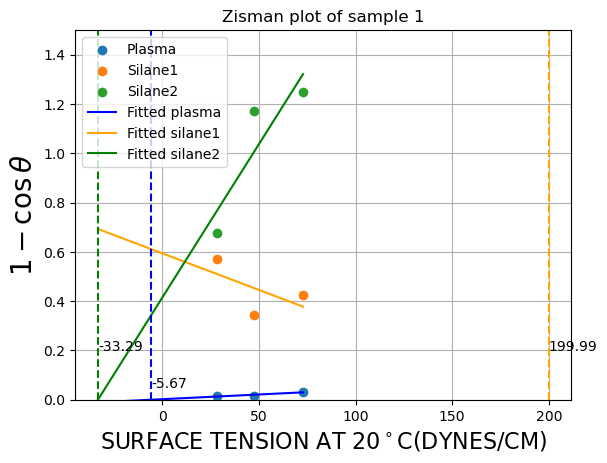

In [40]:
from sklearn.metrics import mean_absolute_percentage_error
#Draw the zisman plot
x_fit_1 = np.linspace(min([x_value_plasma_1,x_value_silane1_1,x_value_silane2_1]),max(surface_tension), 100)
y_fit1_1 = fit_line_plasma_1(x_fit_1)
y_fit2_1 = fit_line_silane1_1(x_fit_1)
y_fit3_1 = fit_line_silane2_1(x_fit_1)
plt.scatter(surface_tension, 1-contact_angle(plasma_1),label='Plasma')
plt.scatter(surface_tension, 1-contact_angle(silane1_1), label='Silane1')
plt.scatter(surface_tension, 1-contact_angle(silane2_1), label='Silane2')
plt.plot(x_fit_1, y_fit1_1, color='blue', label='Fitted plasma')
plt.plot(x_fit_1, y_fit2_1, color='orange', label='Fitted silane1')
plt.plot(x_fit_1, y_fit3_1, color='green', label='Fitted silane2')
plt.xlabel(r'SURFACE TENSION AT $20^\circ$C(DYNES/CM)',fontsize=16)
plt.ylabel(r"$1-\cos\theta$",fontsize=20)
plt.title('Zisman plot of sample 1')
plt.legend(loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.axvline(x_value_silane2_1, color='green', linestyle='--')
plt.axvline(x_value_silane1_1, color='orange', linestyle='--')
plt.axvline(x_value_plasma_1, color='blue', linestyle='--')
plt.text(x_value_plasma_1,0.05,np.round(x_value_plasma_1, decimals=2))
plt.text(x_value_silane2_1,0.2,np.round(x_value_silane2_1, decimals=2))
plt.text(x_value_silane1_1,0.2,np.round(x_value_silane1_1, decimals=2))
error_plasma=mean_absolute_percentage_error(fit_line_plasma_1(surface_tension),contact_angle(plasma_1))
error_silane1=mean_absolute_percentage_error(fit_line_silane1_1(surface_tension),contact_angle(silane1_1))
error_silane2=mean_absolute_percentage_error(fit_line_silane2_1(surface_tension),contact_angle(silane2_1))
error={'plasma':error_plasma,'silane1':error_silane1,'silane2':error_silane2}
print(error)
plt.show()

### Sample 2

{'plasma': 54.4006490971209, 'silane1': 2.6218943030237276, 'silane2': 0.9396018235005618}


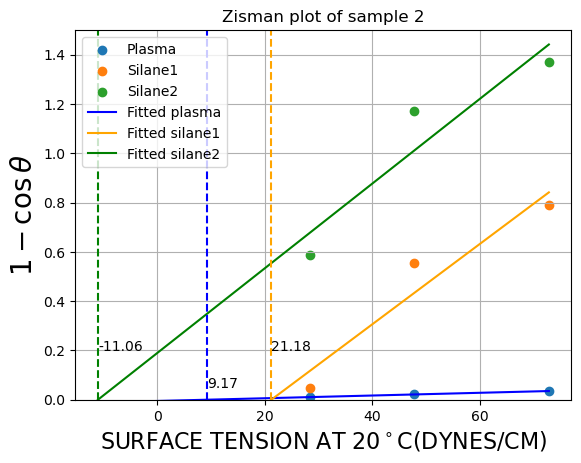

In [41]:
#Draw the zisman plot
x_fit_2 = np.linspace(min([x_value_plasma_2,x_value_silane1_2,x_value_silane2_2]),max(surface_tension), 100)
y_fit1_2 = fit_line_plasma_2(x_fit_2)
y_fit2_2 = fit_line_silane1_2(x_fit_2)
y_fit3_2 = fit_line_silane2_2(x_fit_2)
plt.scatter(surface_tension, 1-contact_angle(plasma_2),label='Plasma')
plt.scatter(surface_tension, 1-contact_angle(silane1_2), label='Silane1')
plt.scatter(surface_tension, 1-contact_angle(silane2_2), label='Silane2')
plt.plot(x_fit_2, y_fit1_2, color='blue', label='Fitted plasma')
plt.plot(x_fit_2, y_fit2_2, color='orange', label='Fitted silane1')
plt.plot(x_fit_2, y_fit3_2, color='green', label='Fitted silane2')
plt.xlabel(r'SURFACE TENSION AT $20^\circ$C(DYNES/CM)',fontsize=16)
plt.ylabel(r"$1-\cos\theta$",fontsize=20)
plt.title('Zisman plot of sample 2')
plt.legend(loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.axvline(x_value_silane2_2, color='green', linestyle='--')
plt.axvline(x_value_silane1_2, color='orange', linestyle='--')
plt.axvline(x_value_plasma_2, color='blue', linestyle='--')
plt.text(x_value_plasma_2,0.05,np.round(x_value_plasma_2, decimals=2))
plt.text(x_value_silane2_2,0.2,np.round(x_value_silane2_2, decimals=2))
plt.text(x_value_silane1_2,0.2,np.round(x_value_silane1_2, decimals=2))
error_plasma=mean_absolute_percentage_error(fit_line_plasma_2(surface_tension),contact_angle(plasma_2))
error_silane1=mean_absolute_percentage_error(fit_line_silane1_2(surface_tension),contact_angle(silane1_2))
error_silane2=mean_absolute_percentage_error(fit_line_silane2_2(surface_tension),contact_angle(silane2_2))
error={'plasma':error_plasma,'silane1':error_silane1,'silane2':error_silane2}
print(error)
plt.show()

### The average value of sample 1 and sample 2

{'plasma': 52.802678393464895, 'silane1': 0.83841160423819, 'silane2': 0.9617834739720488}


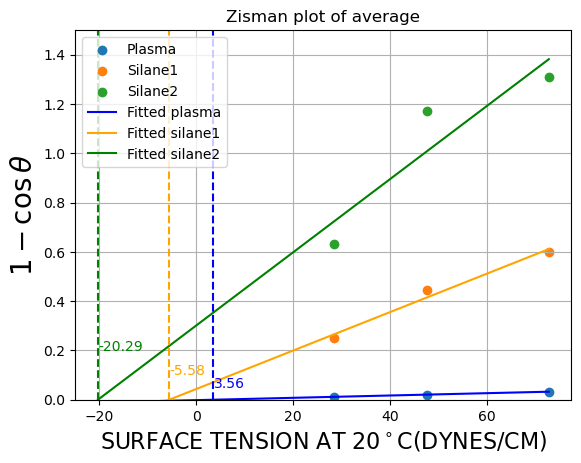

In [51]:
#Draw the zisman plot
x_fit_av = np.linspace(min([x_value_plasma_av,x_value_silane1_av,x_value_silane2_av]),max(surface_tension), 100)
y_fit1_av = fit_line_plasma_av(x_fit_av)
y_fit2_av = fit_line_silane1_av(x_fit_av)
y_fit3_av = fit_line_silane2_av(x_fit_av)
plt.scatter(surface_tension, 1-contact_angle(plasma_av),label='Plasma')
plt.scatter(surface_tension, 1-contact_angle(silane1_av), label='Silane1')
plt.scatter(surface_tension, 1-contact_angle(silane2_av), label='Silane2')
plt.plot(x_fit_av, y_fit1_av, color='blue', label='Fitted plasma')
plt.plot(x_fit_av, y_fit2_av, color='orange', label='Fitted silane1')
plt.plot(x_fit_av, y_fit3_av, color='green', label='Fitted silane2')
plt.xlabel(r'SURFACE TENSION AT $20^\circ$C(DYNES/CM)',fontsize=16)
plt.ylabel(r"$1-\cos\theta$",fontsize=20)
plt.title('Zisman plot of average')
plt.legend(loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.axvline(x_value_silane2_av, color='green', linestyle='--')
plt.axvline(x_value_silane1_av, color='orange', linestyle='--')
plt.axvline(x_value_plasma_av, color='blue', linestyle='--')
plt.text(x_value_plasma_av,0.05,np.round(x_value_plasma_av, decimals=2),color='blue')
plt.text(x_value_silane2_av,0.2,np.round(x_value_silane2_av, decimals=2),color='green')
plt.text(x_value_silane1_av,0.1,np.round(x_value_silane1_av, decimals=2),color='orange')
error_plasma=mean_absolute_percentage_error(fit_line_plasma_av(surface_tension),contact_angle(plasma_av))
error_silane1=mean_absolute_percentage_error(fit_line_silane1_av(surface_tension),contact_angle(silane1_av))
error_silane2=mean_absolute_percentage_error(fit_line_silane2_av(surface_tension),contact_angle(silane2_av))
error={'plasma':error_plasma,'silane1':error_silane1,'silane2':error_silane2}
print(error)
plt.show()

In [99]:
fit_line_plasma(plasma)

array([0.09853434, 0.09994192, 0.09636433])

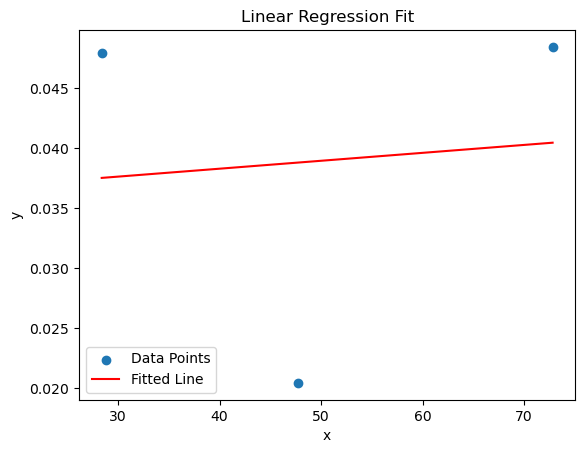

In [33]:
coefficients_plasma = np.polyfit(surface_tension,1-contact_angle(plasma) , 1)
fit_line_plasma = np.poly1d(coefficients_plasma)
x_fit1 = np.linspace(min(surface_tension), max(surface_tension), 100)
y_fit1 = fit_line_plasma(x_fit1)
plt.scatter(surface_tension, 1-contact_angle(plasma), label='Data Points')
plt.plot(x_fit1, y_fit1, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [83]:
# Calculating the value of x when y = 0
def solve(model):
    m = model.coef_[0]
    b = model.intercept_
    x_when_y_is_zero = (1-b) / m
    return x_when_y_is_zero 
solve(model1)

-29.530156645566652

In [84]:
model1.intercept_

0.992922154722191

In [78]:
data3=pd.read_excel('test3.xlsx',sheet_name='Sheet1')
data3

,name,angle
0,plasma-ethyleneglycol-1,169.402
1,plasma-toluene-1,170.186
2,plasma-water-1,167.133
3,silane1-ethyleneglycol-1,135.238
4,silane1-toluene-1,119.055
5,silane1-water-1,116.565
6,silane2-ethyleneglycol-1,78.871
7,silane2-toluene-1,117.951
8,silane2-water-1,80.949


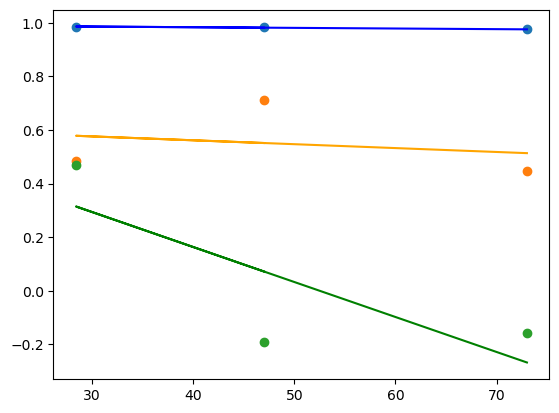

In [79]:
surface_tension_2d = np.array(surface_tension).reshape(-1, 1)
angle=data3['angle']
angle1=angle[0:3]
angle2=angle[3:6]
angle3=angle[6:]
model1=LinearRegression().fit(surface_tension_2d, contact_angle(angle1))
model2=LinearRegression().fit(surface_tension_2d, contact_angle(angle2))
model3=LinearRegression().fit(surface_tension_2d, contact_angle(angle3))
plt.scatter(surface_tension, contact_angle(angle1),label='Plasma')
plt.scatter(surface_tension, contact_angle(angle2), label='Silane1')
plt.scatter(surface_tension, contact_angle(angle3), label='Silane2')
y1=model1.predict(surface_tension_2d)
y2=model2.predict(surface_tension_2d)
y3=model3.predict(surface_tension_2d)
plt.plot(surface_tension, y1, color='blue', label='Fitted plasma')
plt.plot(surface_tension, y2, color='orange', label='Fitted silane1')
plt.plot(surface_tension, y3, color='green', label='Fitted silane2')